# Projeto 1 - Análise exploratória de dados
                                                    Caio Horschutz Fauza
                                                    2° C - Engenharia 


# Informações sobre o projeto:
Indíces escolhidos: IDH, inflação (anual %) e suprimento de comida (kgcal/pessoa & dia)
    
    
Pergunta: Qual a relação da taxa anual de inflação na alimentação diária da população, refletindo consequentemente, no IDH? 

Objetivos secundários: 
* Análise de possível eficiência de políticas públicas voltadas ao aumento do IDH de acordo com análise exploratória de dados
* Verificação de correlação dos dados
    
Ano escolhido inicialmente para análise: 2007

# Coleta e desenvolvimento dos dados
* Limpeza da base para melhor análise
* Separação e disposição dos dados de maneira organizada

In [36]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


idh = pd.read_excel("Indicator_HDI.xlsx")
food = pd.read_excel("indicator food_consumption.xlsx")
inf = pd.read_excel("Inflation.xlsx")


idh2007 = idh.loc[:, ["HDI", 2007]]
food2007 = food.loc[:,["Food", 2007]]
inf2007 = inf.loc[:, ["Inflation, GDP deflator (annual %)", 2007]]


idh_i = idh2007.set_index("HDI")
food_i = food2007.set_index("Food")
inf_i = inf2007.set_index("Inflation, GDP deflator (annual %)")

joined = idh_i.join(inf_i, how="inner", lsuffix="_IDH", rsuffix="_Inflação")
dados = joined.join(food_i, how ="inner")

dados.rename(columns={2007 : "2007_Comida"}, inplace = True)
dados.to_csv("dados.csv")
dados.head(25)



,2007_IDH,2007_Inflação,2007_Comida
Abkhazia,NaN,NaN,NaN
Afghanistan,0.363,13.208274,NaN
Akrotiri and Dhekelia,NaN,NaN,NaN
Albania,0.729,2.024081,2879.57
Algeria,0.680,7.331055,3153.38
American Samoa,NaN,NaN,NaN
Andorra,NaN,3.870000,NaN
Angola,0.471,12.616432,1973.29
Anguilla,NaN,NaN,NaN
Antigua and Barbuda,NaN,23.258314,2368.50


* Criação de função para linha de tendência 
* Plotagem de gráficos de dispersão entre os dados separados no dataframe
* Execução de tabela de correlação entre os dados

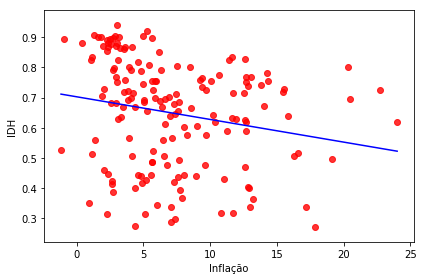

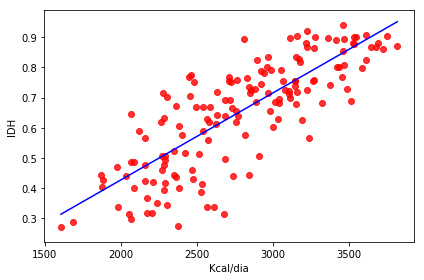

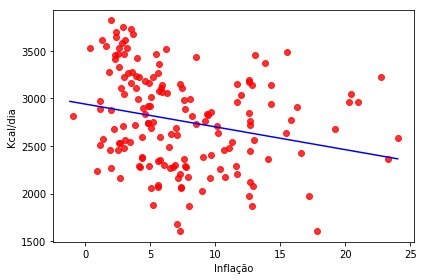

,2007_IDH,2007_Inflação,2007_Comida
2007_IDH,1.000000,-0.214771,0.803180
2007_Inflação,-0.214771,1.000000,-0.230099
2007_Comida,0.803180,-0.230099,1.000000


In [13]:
def reta(x, y, titulox, tituloy):
    a = y.cov(x)/x.var()
    b = y.mean() - a*x.mean()    
    plt.scatter(x, y, c= "red", alpha=0.8)
    plt.plot((x.min(), x.max()), (a*x.min()+b, a*x.max()+b), color='blue')
    plt.xlabel(titulox)
    plt.ylabel(tituloy)
    plt.tight_layout()
    plt.show()
    

reta(dados["2007_Inflação"], dados["2007_IDH"], "Inflação", "IDH")
reta(dados["2007_Comida"], dados["2007_IDH"], "Kcal/dia", "IDH")
reta(dados["2007_Inflação"], dados["2007_Comida"], "Inflação", "Kcal/dia")
dados.corr()

# Conclusão Primária

Após serem relacionados os 3 índices (IDH, Inflação e Kcal/pessoa/dia) as seguintes conclusões para o ano de 2007 foram obtidas:
* IDH e inflação não possuem correlação relevante (0.2)
* IDH e quantidade média de Kcal ingeridas diariamente pela população possuem alta correlação (0.80)

Tais afirmações podem ser observadas no gráfico e na tabela de correlação abaixo:

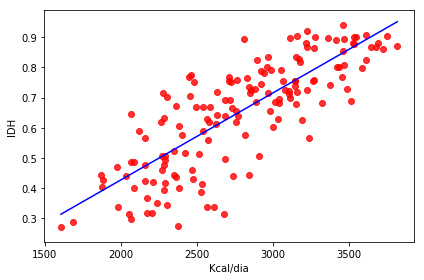

,2007_IDH,2007_Inflação,2007_Comida
2007_IDH,1.000000,-0.214771,0.803180
2007_Inflação,-0.214771,1.000000,-0.230099
2007_Comida,0.803180,-0.230099,1.000000


In [14]:

reta(dados["2007_Comida"], dados["2007_IDH"], "Kcal/dia", "IDH")
dados.corr()

Tais informações permitem nos dizer que, de acordo com os dados, investir os recursos do governo no combate a inflação pode não influenciar no Índice de Desenvolvimento Humano. Políticas públicas voltadas a melhoria na alimentação e suprimento de energia diária necessária (em conjunto com outros fatores, como por exemplo saúde) podem ser mais efetivas na elevação do IDH.

Ao se relacionar quantidade média de ingestão de Kcal por dia pela população e inflação, o índice de correlação foi de 0.23, o que não nos permite relacionar as duas informações e avaliar os impactos de uma sobre a outra de maneira clara, ou seja, a inflação não está relacionada com a ingestão diária de Kcal e consequemente com o IDH (pergunta principal do projeto de análise), porém, a ingestão de Kcal está relacionada ao IDH (países com IDH alto possuem maior média de Kcal diárias)



# Ampliação de análise

Para apresentar uma conclusão mais clara e temporal, realizou-se a ampliação do dataframe nos índices IDH e Kcal por dia/pessoa para conter também os anos 2006, 2005 e 2000.

In [34]:
idh2006 = idh.loc[:, ["HDI", 2006]]
idh2005 = idh.loc[:, ["HDI", 2005]]
idh2000 = idh.loc[:, ["HDI", 2000]]

food2006 = food.loc[:, ["Food", 2006]]
food2005 = food.loc[:,["Food", 2005]]
food2000 = food.loc[:,["Food", 2000]]

idh_i6 = idh2006.set_index("HDI")
food_i6 = food2006.set_index("Food")
idh_i5 = idh2005.set_index("HDI")
food_5 = food2005.set_index("Food")
idh_i0 = idh2000.set_index("HDI")
food_i0 = food2000.set_index("Food")

a1 = idh_i.join(idh_i6, how="inner", lsuffix="_IDH", rsuffix="_IDH")
b1 =a1.join(idh_i5, how ="inner")
b2 = b1.join(idh_i0, how = "inner")
b2.rename(columns={2007 : "2007_IDH", 2006 : "2006_IDH", 2005: "2005_IDH", 2000: "2000_IDH"}, inplace = True)
b3 = b2.join(food_i, how = 'inner')
b4 = b3.join(food_i6, how = "inner")
b5 = b4.join(food_i5, how = "inner")
dadosampliados = b5.join(food_i0, how = "inner")
dadosampliados.rename(columns={2007 : "2007_Kcal", 2006: "2006_Kcal", 2005: "2005_Kcal", 2000: "2000_Kcal"}, inplace = True)
dadosampliados.head()



,2007_IDH,2006_IDH,2005_IDH,2000_IDH,2007_Kcal,2006_Kcal,2005_Kcal,2000_Kcal
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,0.363,0.354,0.340,0.230,NaN,NaN,NaN,NaN
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,0.729,0.724,0.721,0.691,2879.57,2914.95,2917.08,2832.07
Algeria,0.680,0.673,0.667,0.624,3153.38,3101.20,3059.24,2928.84


Com os dados organizados, realizou-se um boxplot com os múltiplos índices/dados :


In [37]:
dadosampliados.groupby(["2007_IDH", "2006_IDH", "2005_IDH"])

box = dadosampliados.melt(id_vars = ["2007_IDH", "2006_IDH"])
sns.boxplot(data = box, x = "Kcal/dia", y = "IDH", hue = "metric")

ValueError: Could not interpret input 'Kcal/dia'